# spanish texts

## text corpus

In [1]:
import pandas as pd 

In [9]:
import pandas as pd
corpus = pd.read_csv('spanish/corpus.txt', delimiter = "\t", header=None)
corpus.columns = ['texts']

In [11]:
corpus = list(corpus['texts'])

In [13]:
corpus[:5]

['El curso está en general bien constituido ',
 'Lo mejor de él es el cuerpo docente con el cual se establece una abierta',
 'El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica']

In [14]:
def tokenize(s):
    return s.split(' ')

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [92]:
from nltk.corpus import stopwords

def clean(sentence):
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    sentence=list(filter(None, [w.lower().translate(table) for w in tokenize(sentence)]))
    sentence = [w for w in sentence if w not in stopwords.words('spanish')]
    #language=[[w for w in s if w!="''"] for s in language] 
    #language=[[w for w in s if w!='̃'] for s in language] 
    sentence=[w for w in sentence if not w.isdigit()]
    return sentence

In [93]:
clean(corpus[0])

['curso', 'general', 'bien', 'constituido']

## basic statistics: types and tokens

In [94]:
clean_corpus = [clean(sentence) for sentence in corpus]

In [95]:
clean_corpus[:5]

[['curso', 'general', 'bien', 'constituido'],
 ['mejor', 'cuerpo', 'docente', 'establece', 'abierta'],
 ['orden', 'contenido'],
 ['pongan',
  'acuerdo',
  'si',
  'va',
  'prorizar',
  'contenido',
  'clases',
  'bibliografía'],
 ['mantenga', 'dinamica', 'separar', 'dias', 'prueba', 'teorica', 'práctica']]

In [96]:
from collections import Counter

In [97]:
words =[item for sublist in clean_corpus for item in sublist]
number_tokens = len(words)
number_types = len(set(words))
print(number_tokens,number_types)

1992 882


## graphs!

In [98]:
import networkx as nx

In [99]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(radius=2):
    G=nx.Graph()
    for sentence in clean_corpus:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    return G

In [100]:
graph_text = GoW()

In [101]:
graph_text.nodes()

NodeView(('curso', 'general', 'bien', 'constituido', 'mejor', 'cuerpo', 'docente', 'establece', 'abierta', 'orden', 'contenido', 'pongan', 'acuerdo', 'si', 'va', 'prorizar', 'clases', 'bibliografía', 'mantenga', 'dinamica', 'separar', 'dias', 'prueba', 'teorica', 'práctica', 'agregue', 'mesa', 'mas', 'practicos', 'fin', 'disminuir', 'numero', 'alumnos', 'mesas', 'permitiendo', 'aprendizaje', 'personalizado', 'deberian', 'haber', 'gustaria', 'hicieran', 'ayudantías', 'pruebas', 'clase', 'vez', 'dejarnos', 'solos', 'identificar', 'estructuras', 'solemnes', 'sigan', 'siendo', 'separadas', 'seminarios', 'hechos', 'casa', 'aconseje', 'libro', 'estudio', 'determinada', 'materia', 'capítulos', 'leer', 'obtener', 'información', 'fuente', 'aporte', 'debería', 'previo', 'profesores', 'cuanto', 'contenidos', 'limites', 'etc', 'trate', 'considera', 'importante', 'evaluará', 'teórica', 'practica', 'ayuda', 'primero', 'aprenden', 'pelvis', 'cortos', 'poca', 'creo', 'tener', 'separada', 'varios', 'dí

In [102]:
import matplotlib.pyplot as plt

def plot_graph(G):
    fig, ax = plt.subplots(dpi=800)
    pos = nx.spring_layout(G)
    labels={i:i for i in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='orange') 
    nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='lime')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=5,font_color='k')
    plt.axis('off')
    plt.show()

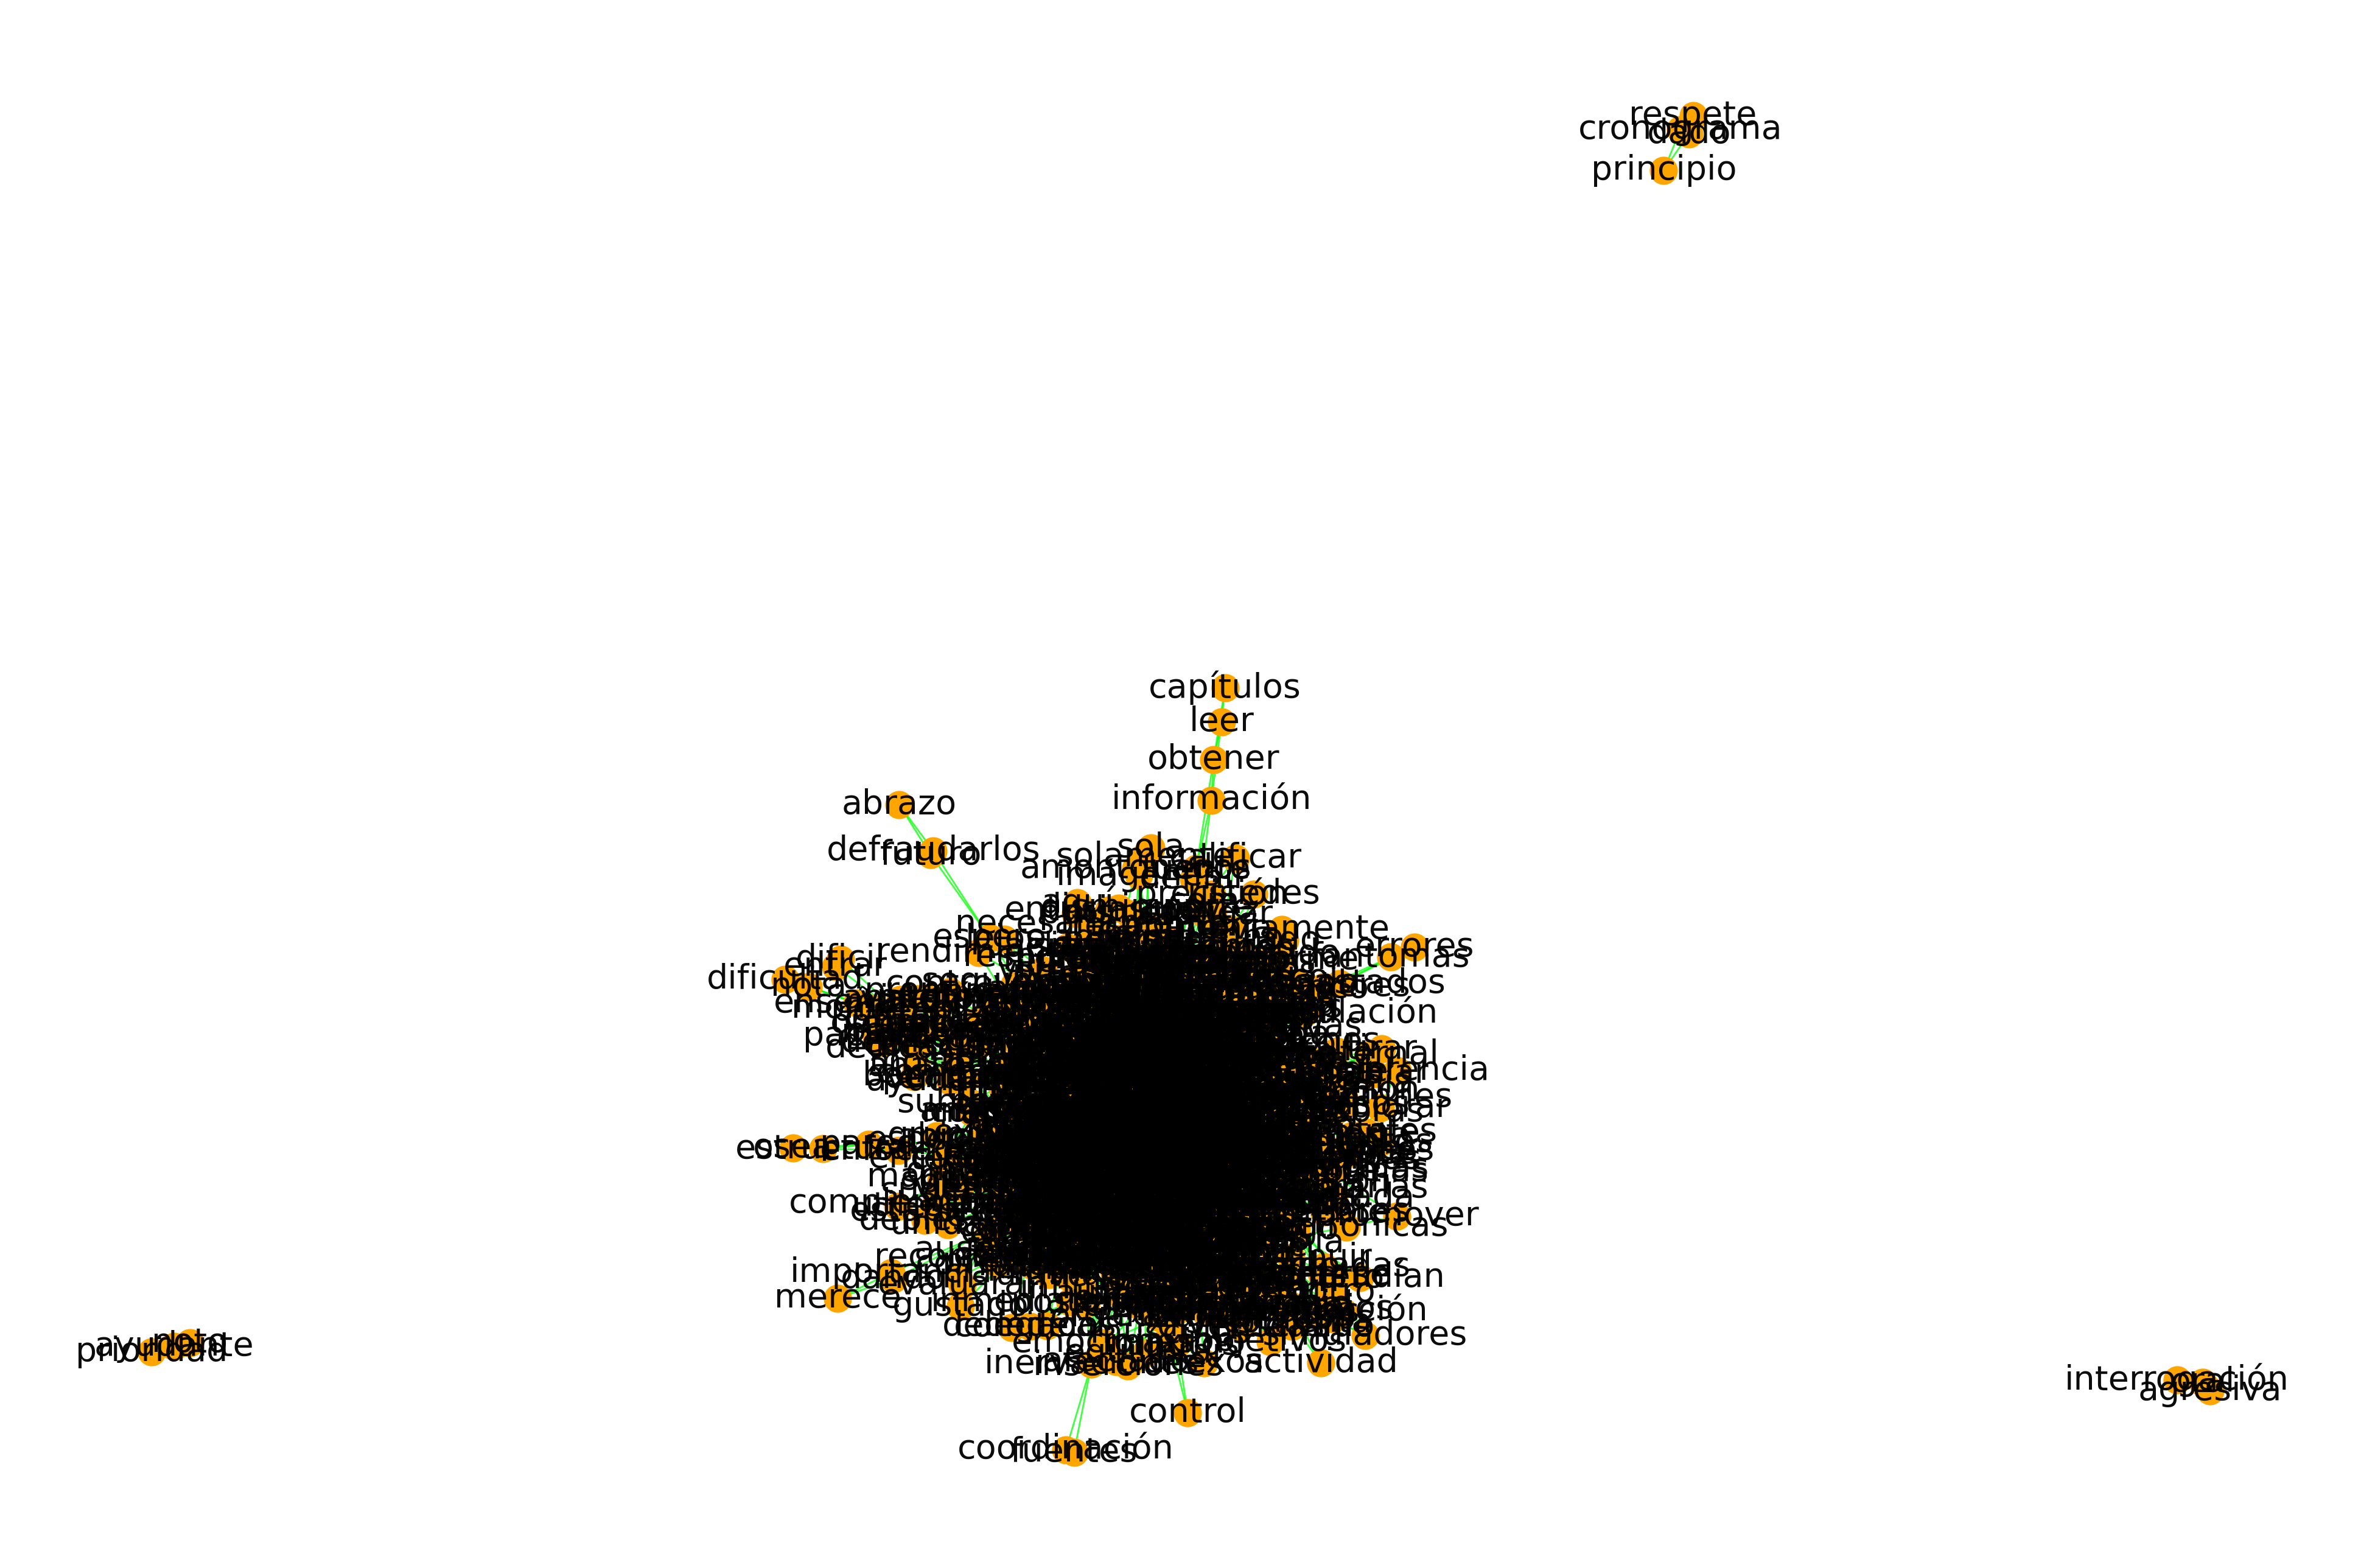

In [103]:
plot_graph(graph_text)

### main core

In [104]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
main_core = nx.k_core(graph_text)

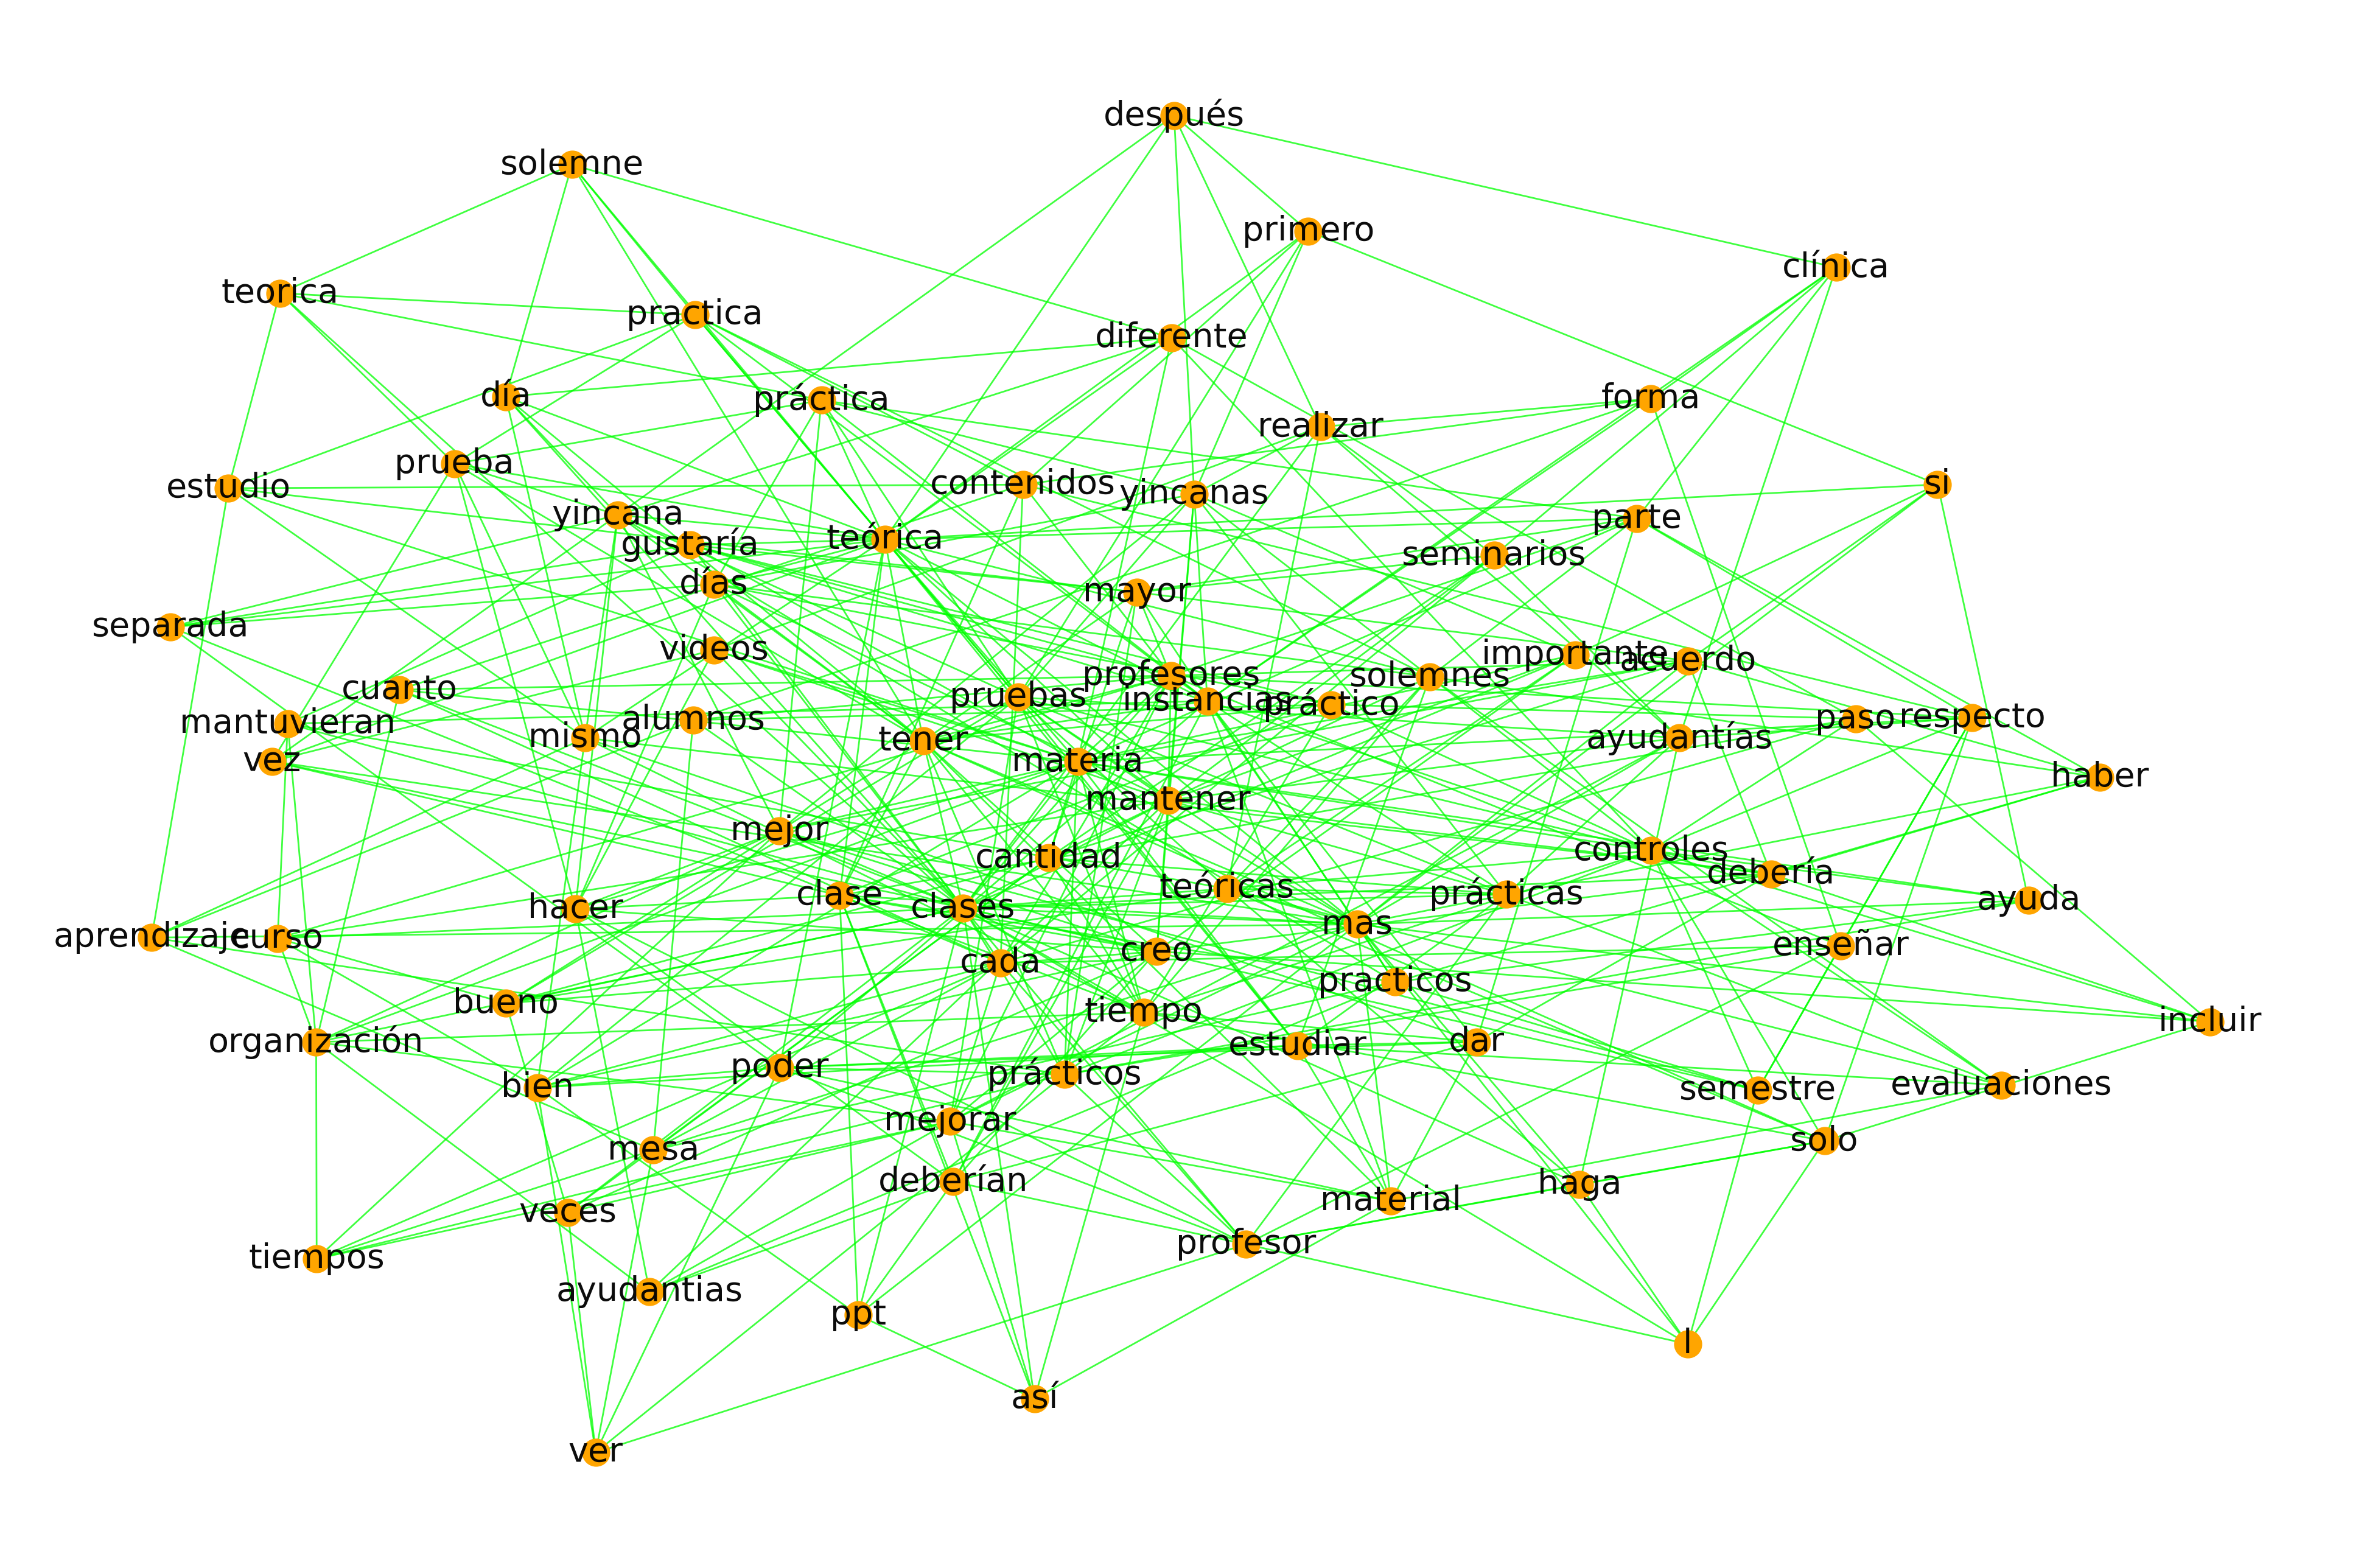

In [105]:
plot_graph(main_core)

## community structure

In [106]:
!pip install python-louvain

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [107]:
import community as community_louvain

In [113]:
partition = community_louvain.best_partition(graph_text,resolution=1)

In [114]:
len(set(partition.values()))

23

In [115]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(partition.items()):
    v[value].append(key)

In [116]:
partition = dict(v)

In [117]:
pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in partition.items() ]))

,6,1,10,12,19,15,13,17,18,14,...,5,4,3,21,20,2,16,0,22,11
0,1er,abarcar,abierta,abierto,abrazo,acerca,aclaran,aconseje,actitud,adecuada,...,afectado,agregaría,agresiva,alternativas,anatomia,anatomicos,apareció,ayudante,cadaveres,cronograma
1,agregaran,actividad,agregar,actividades,agradesco,alcanza,ambas,ambigüedad,además,anexos,...,agradezco,choros,interrogación,ambigüedades,aparescan,aprende,ausencia,noto,complementar,dado
2,anatomy,acuerdo,alumnos,agradecen,apoyando,alcanzan,anterior,ansiedad,anato,autores,...,audiovisual,clara,oral,angiografias,aplicaciones,clínicos,colaborativas,prioridad,complemento,principio
3,aplicacion,alumnado,amontonados,anatomía,aprendí,algún,aquí,cambiar,apenas,base,...,ayudarnos,completa,NaN,contenidos,apps,conceptos,compañía,NaN,disecciones,respete
4,apto,anatómicas,cuerpo,aspecto,ayudaba,aprendido,ayudantias,com,aproximadamente,bibliografía,...,cercanía,conductor,NaN,control,aprender,conocimiento,controles,NaN,eliminar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,NaN,trabajos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,trate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,util,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,va,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
